Hanel et al., iScience 2025

### Fig. 8: 
- utilizes single cell total RNA content as a proxy for cell size
- examines cell type-specific differential scaling of G1/S regulators during G1 growth

In [2]:
library(dplyr)
library(anndata)
library(ggplot2)
library(patchwork)
library(tibble)

library(scales)

#to be able to adjust figs
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

set.seed(333) 
Sys.time()

[1] "2025-05-05 22:41:47 EEST"

In [3]:
adata = read_h5ad("/research/work/andreha/privat/Andrea/2025_Sylvain/data/adata_HCAmt_MAD5_Level3M_68types_norm.h5ad")
adata

AnnData object with n_obs × n_vars = 95685 × 24760
    obs: 'donor_id', 'Level 3M', 'Level 2', 'Level 1', 'sex', 'age', 'age_category', 'total_RNA_in_cell'
    var: 'gene_ids', 'gene_count', 'ensembl_gene_id', 'entrezgene_id', 'external_gene_name', 'hgnc_symbol', 'description', 'chromosome_name', 'start_position', 'end_position', 'gene_biotype', 'strand'
    layers: 'log1p_norm', 'norm'

In [4]:
adata$obs$cell_type = adata$obs$`Level 3M`

In [5]:
adata$obs$pseudobulk_id <- paste(adata$obs$`Level 3M`, adata$obs$donor_id, sep = "_")

In [6]:
rownames(adata$obs) = adata$obs$cell_barcode

In [8]:
#Sun test

colorcode <- c(
  # HSPC
  "HSC-2"   = "#fbd1dc",  
#  "MPP-1"   = "#ffb6ca",  
  "MPP-2"   = "#ff9bb9",  
#  "MPP-MEP" = "#ff7ca6",   

#"LMPP-1"         = "#FAD0F8",  
#"LMPP-1-cycling" = "#EDB6F4",   

#"Multilin-1" = "#DFD8F6",  
#"Multilin-2" = "#CCC5ED",  

#"Multilin-1" = "#DFD8F6",  
#"Multilin-2" = "#CCC5ED",  
#
#    
#   "MEP-1" = "#f7ccc2",
#  "MEP-2" = "#fbb9ab",
#  "MEP-Eryth-1" = "#fea597",
#  "MEP-Eryth-2" = "#ff9183",
# 
#  "ERP-1" = "#ff7b6f",
#  "ERP-2" = "#fe615b",
#  "ERP-3" = "#f7484a",
#  "ERP-4" = "#e8383d",
#  "ERP-5" = "#d62d32",
#  "ERP-6" = "#c22128",
  "ERP-7" = "#ae131d",
  "ERP-8" = "#9D0717",
  
# "Erythroblast-1" = "#7d0616",
# "Erythroblast-2" = "#610412",
# "Erythroblast-3" = "#45000a",

#  "Erythroblast-1" = "#610412",
#  "Erythroblast-2" = "#45000a",
#  "Erythroblast-3" = "#3E000C",
   # nearly black-red  

#  # MKP
#  "MKP-early" = "#C4A09A",  
#  "MKP-late" = "#9D7E78",  

  # Lymphoid
 # "CLP" = "#DEF0F5",  
 # "Pro-B-Early" = "#c8e9f0",  
  "Pro-B-1" = "#a7dde7",  
 # "Pro-B-cycling-2" = "#80d0de",  
 # "Pro-B-Early-cycling" = "#5cc7d6",  
 # "Pro-B-cycling-1" = "#42bace",  
#  "Transitional-B-1" = "#3bafc7",  
#  "Pro-B-2" = "#318cb4",  
#  "pre-B" = "#276C9B",  
#  "B Memory-1" = "#1F4C83",  
#  "B Memory-2" = "#173B69",  
#  "Plasma Cell" = "#0C2048",  

  # T NK
#  "CD4 TCM" = "#4D0038",  
#  "T CD4 Naive-2" = "#6C2E44",  
#  "T CD8 Naive" = "#8C5968",  
#  "CD8 TEM" = "#522E48",  
#  "MAIT" = "#6C7469",  
#  "NK-Mature" = "#53424d",  

  # MultiLin-GMPs
#  "MultiLin-GMP-2" = "#e5dbce",  
#  "MultiLin-GMP-3" = "#d0bea4",  
#  "MultiLin-GMP-2" = "#e5dbce",  
#  "MultiLin-GMP-3" = "#D2BFAF",  
    
#  "preNeu"    = "#d4cfc9",  
#  "immNeu-1"  = "#b8b0a8",  
#
  # Myeloid
#  "cMOP" = "#F0D4BA",  
#  "Mono-1" = "#E0B89F",  
#  "Mono-2" = "#D29773",  
#  "Intermediate Mono-1" = "#C5794C",  
#  "Intermediate Mono-2" = "#B75926",  
#  "Intermediate Mono-3" = "#983306",  
#  "Classical-Mono" = "#761706",  
#  "Non-Classical Mono-2" = "#590007",  
#  "Myeloid intermediate 1" = "#F5ECD7",  
#  "Myeloid intermediate 2" = "#FBE4CA",  
#  "Myeloid intermediate 3" = "#F5DBBF",  
#
  # DC
#  "MDP-2"     = "#ffcec2",  
#  "MDP-3"     = "#f3b9ad",
 # "MDP-5"     = "#e5a499",
  "pre-DC-1"  = "#d78e83"#,
#  "pre-DC-3"  = "#c7786c",
 # "cDC1"      = "#b26358",
#  "cDC2-1"    = "#97504d"#,
#  "cDC2-2"    = "#7a3e3e",
#  "pDC" = "#BC4F57",    
#  "ASDC" = "#C46A71"

)

labelorder <- names(colorcode)

In [9]:
adata_subset <- subset(adata, adata$obs$cell_type %in% labelorder)
adata_subset


View of AnnData object with n_obs × n_vars = 6294 × 24760
    obs: 'donor_id', 'Level 3M', 'Level 2', 'Level 1', 'sex', 'age', 'age_category', 'total_RNA_in_cell', 'cell_type', 'pseudobulk_id'
    var: 'gene_ids', 'gene_count', 'ensembl_gene_id', 'entrezgene_id', 'external_gene_name', 'hgnc_symbol', 'description', 'chromosome_name', 'start_position', 'end_position', 'gene_biotype', 'strand'
    layers: 'log1p_norm', 'norm'

In [10]:
adata_subset

View of AnnData object with n_obs × n_vars = 6294 × 24760
    obs: 'donor_id', 'Level 3M', 'Level 2', 'Level 1', 'sex', 'age', 'age_category', 'total_RNA_in_cell', 'cell_type', 'pseudobulk_id'
    var: 'gene_ids', 'gene_count', 'ensembl_gene_id', 'entrezgene_id', 'external_gene_name', 'hgnc_symbol', 'description', 'chromosome_name', 'start_position', 'end_position', 'gene_biotype', 'strand'
    layers: 'log1p_norm', 'norm'

In [11]:
df = as.data.frame(table(adata_subset$obs$cell_type))
#df

df$Var1 <- factor(df$Var1, levels = labelorder)
df <- df[order(df$Var1), ]
df

,Var1,Freq
,<fct>,<int>
3,HSC-2,732
4,MPP-2,554
1,ERP-7,783
2,ERP-8,3534
5,Pro-B-1,272
6,pre-DC-1,419


In [12]:
#ad2 <- subset(adata_subset, adata_subset$obs$cell_type %in% selected_cell_types)
ad2 = adata_subset

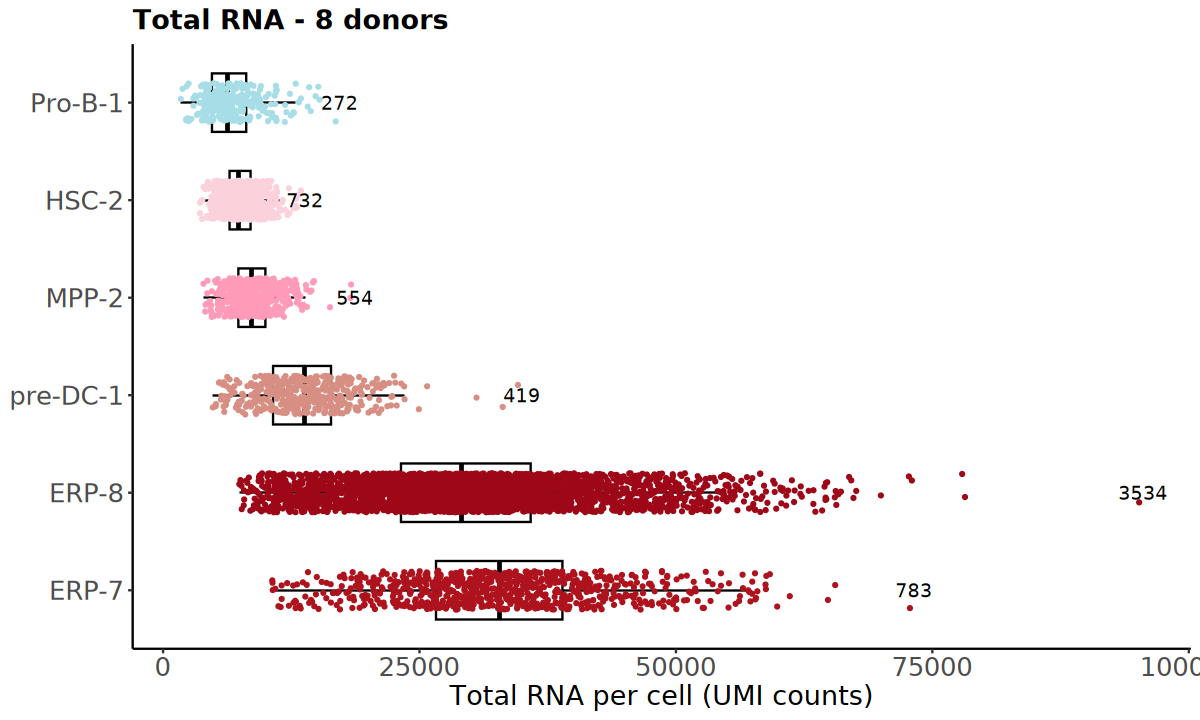

In [14]:
x_norm <- as.matrix(ad2$layers[["norm"]]) 

x_norm <- t(x_norm)

expr_df <- as.data.frame(x_norm) 
expr_df <- t(expr_df) 
expr_df <- as.data.frame(expr_df) 
expr_df$cell_id <- rownames(expr_df)  

# merge with metadata from ad2

expr_df <- cbind(expr_df, ad2$obs)

expr_df <- expr_df %>%
  mutate(cell_type = factor(cell_type))

ordered_celltypes <- expr_df %>%
  group_by(cell_type) %>%
  summarise(median_rna = median(total_RNA_in_cell, na.rm = TRUE)) %>%
  arrange(desc(median_rna)) %>%   #order my bedian 
  pull(cell_type)

expr_df <- expr_df %>%
  mutate(cell_type = factor(cell_type, levels = ordered_celltypes))

cell_counts <- expr_df %>%
  group_by(cell_type) %>%
  summarise(
    n = n(),
    max_y = max(total_RNA_in_cell, na.rm = TRUE)
  )

fig(10, 6)
rnaplot = ggplot(expr_df, aes(x = cell_type, y = total_RNA_in_cell)) +
  geom_boxplot(outlier.shape = NA, width = 0.6, color = "black", alpha = 0.4) +
  geom_jitter(aes(color = cell_type), width = 0.2, alpha = 1, size = 0.7) +
  geom_text(data = cell_counts,
            aes(x = cell_type, y = max_y + 350, label = n),
            inherit.aes = FALSE,
            size = 4) +
  scale_color_manual(values = colorcode) +
  coord_flip() +
  theme_classic() +
  theme(
    axis.text.x = element_text(size = 15), 
    axis.text.y = element_text(size = 15),
    axis.title.y = element_blank(),
    axis.title.x = element_text(size = 16),
    plot.title = element_text(size = 16, face = "bold"),
    legend.position = "none"
  ) +
  labs(
    y = "Total RNA per cell (UMI counts)",
    title = "Total RNA - 8 donors"
  )

rnaplot

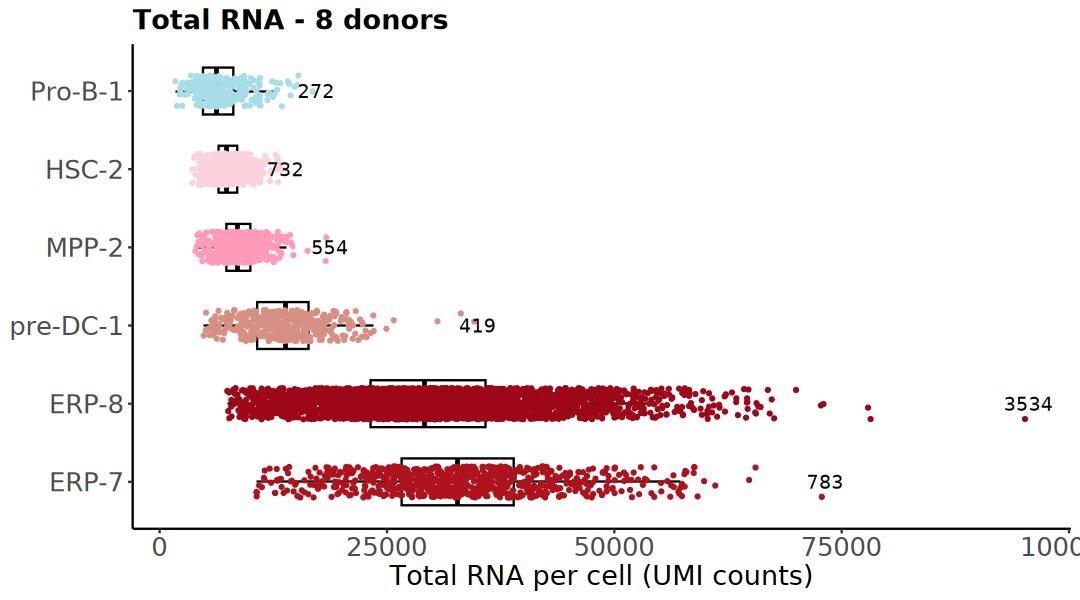

In [16]:
fig(9,5)
rnaplot

In [17]:
ggsave("./data/rna_plot.pdf", 
       rnaplot, width = 10, height = 6, 
       units = "in", useDingbats = FALSE)

In [112]:
obs_df <- as.data.frame(ad2$obs)

obs_df$merged_cell_type <- as.character(obs_df$cell_type)

obs_df$merged_cell_type[obs_df$cell_type %in% c("HSC-2", "MPP-1", "MPP-2")] <- "HSC/MPP"
obs_df$merged_cell_type[obs_df$cell_type %in% c("LMPP-1", "LMPP-1-cycling")] <- "LMPP-1/cycling"
obs_df$merged_cell_type[obs_df$cell_type %in% c("Multilin-1", "MEP-1")] <- "Multilin-1/MEP-1"
obs_df$merged_cell_type[obs_df$cell_type %in% c("Multilin-2", "MEP-2")] <- "Multilin-2/MEP-2"

ad2$obs <- obs_df

expr_df <- as.data.frame(ad2$layers[["norm"]])
colnames(expr_df) <- rownames(ad2$var)
expr_df <- cbind(expr_df, ad2$obs)


In [113]:
expr_df <- as.data.frame(ad2$layers[["norm"]])
colnames(expr_df) <- rownames(ad2$var)
expr_df <- cbind(expr_df, ad2$obs)

iqr_bounds <- expr_df %>%
  group_by(cell_type) %>%
  summarise(
    Q1 = quantile(total_RNA_in_cell, 0.25, na.rm = TRUE),
    Q3 = quantile(total_RNA_in_cell, 0.75, na.rm = TRUE),
    IQR = Q3 - Q1,
    upper_cutoff = Q3 + 1.5 * IQR
  )

iqr_bounds

cell_type,Q1,Q3,IQR,upper_cutoff
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
ERP-1,10450.50,13929.50,3479.00,19148.00
ERP-2,12400.00,17239.25,4839.25,24498.12
ERP-3,15838.75,23118.00,7279.25,34036.88
ERP-4,15092.00,20626.00,5534.00,28927.00
ERP-5,22977.00,33672.50,10695.50,49715.75
ERP-6,18937.00,27285.00,8348.00,39807.00
ERP-7,26609.00,38933.00,12324.00,57419.00
ERP-8,23194.00,35837.00,12643.00,54801.50
Erythroblast-2,10096.75,22498.00,12401.25,41099.88


In [114]:
ad2

AnnData object with n_obs × n_vars = 17845 × 24760
    obs: 'donor_id', 'Level 3M', 'Level 2', 'Level 1', 'sex', 'age', 'age_category', 'total_RNA_in_cell', 'cell_type', 'pseudobulk_id', 'merged_cell_type'
    var: 'gene_ids', 'gene_count', 'ensembl_gene_id', 'entrezgene_id', 'external_gene_name', 'hgnc_symbol', 'description', 'chromosome_name', 'start_position', 'end_position', 'gene_biotype', 'strand'
    layers: 'log1p_norm', 'norm'

In [24]:
ad_sub <- subset(ad2, ad2$obs$cell_type %in% c("pre-DC-1", "MDP-5"))

genes_to_extract <- c("CDKN2C", "CDKN2D")
genes_available <- intersect(genes_to_extract, rownames(ad_sub$var))

expr_mat <- ad_sub$layers[["norm"]][, genes_available]
expr_df <- as.data.frame(as.matrix(expr_mat))
colnames(expr_df) <- genes_available

expr_df <- cbind(
  expr_df,
  cell = rownames(ad_sub),
  total_RNA_in_cell = ad_sub$obs$total_RNA_in_cell,
  cell_type = ad_sub$obs$cell_type
)

head(expr_df)


,CDKN2C,CDKN2D,cell,total_RNA_in_cell,cell_type
,<dbl>,<dbl>,<chr>,<dbl>,<fct>
2888,0.0000000,0.0000000,2888,10974,pre-DC-1
2889,0.0000000,0.6964759,2889,14358,pre-DC-1
2890,0.6112843,0.0000000,2890,16359,pre-DC-1
2892,0.0000000,0.0000000,2892,6215,pre-DC-1
2893,0.0000000,1.2478163,2893,8014,pre-DC-1
2894,0.7406310,0.0000000,2894,13502,pre-DC-1


In [25]:
write.table (expr_df, "./data/G1S_examplegenes_preDC-MDP.csv", sep = ",")

In [82]:
library(ggplot2)
library(dplyr)
library(patchwork)

# Step 1: Prepare expression + metadata
expr_df <- as.data.frame(ad2$layers[["norm"]])
colnames(expr_df) <- rownames(ad2$var)
expr_df <- cbind(expr_df, ad2$obs)

# Step 2: Recalculate IQR bounds per cell_type
iqr_bounds <- expr_df %>%
  group_by(merged_cell_type) %>%
  summarise(
    Q1 = quantile(total_RNA_in_cell, 0.25, na.rm = TRUE),
    Q3 = quantile(total_RNA_in_cell, 0.75, na.rm = TRUE),
    IQR = Q3 - Q1,
    upper_cutoff = Q3 + 1.5 * IQR
  )

iqr_bounds

merged_cell_type,Q1,Q3,IQR,upper_cutoff
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
ERP_78,23682.00,36622.00,12940.00,56032.00
Erythroblast-2,10096.75,22498.00,12401.25,41099.88
Erythroblast-3,6902.25,19812.50,12910.25,39177.88
HSC/MPP,6667.75,9258.75,2591.00,13145.25
LMPP-1,9572.00,13673.00,4101.00,19824.50
LMPP-1-cycling,9765.25,13819.50,4054.25,19900.88
MDP-5/pre-DC-1,9595.00,15859.50,6264.50,25256.25
MEP-1,13283.50,19629.50,6346.00,29148.50
Mono-2,2791.00,4903.00,2112.00,8071.00


## Plot 1 - Final genes

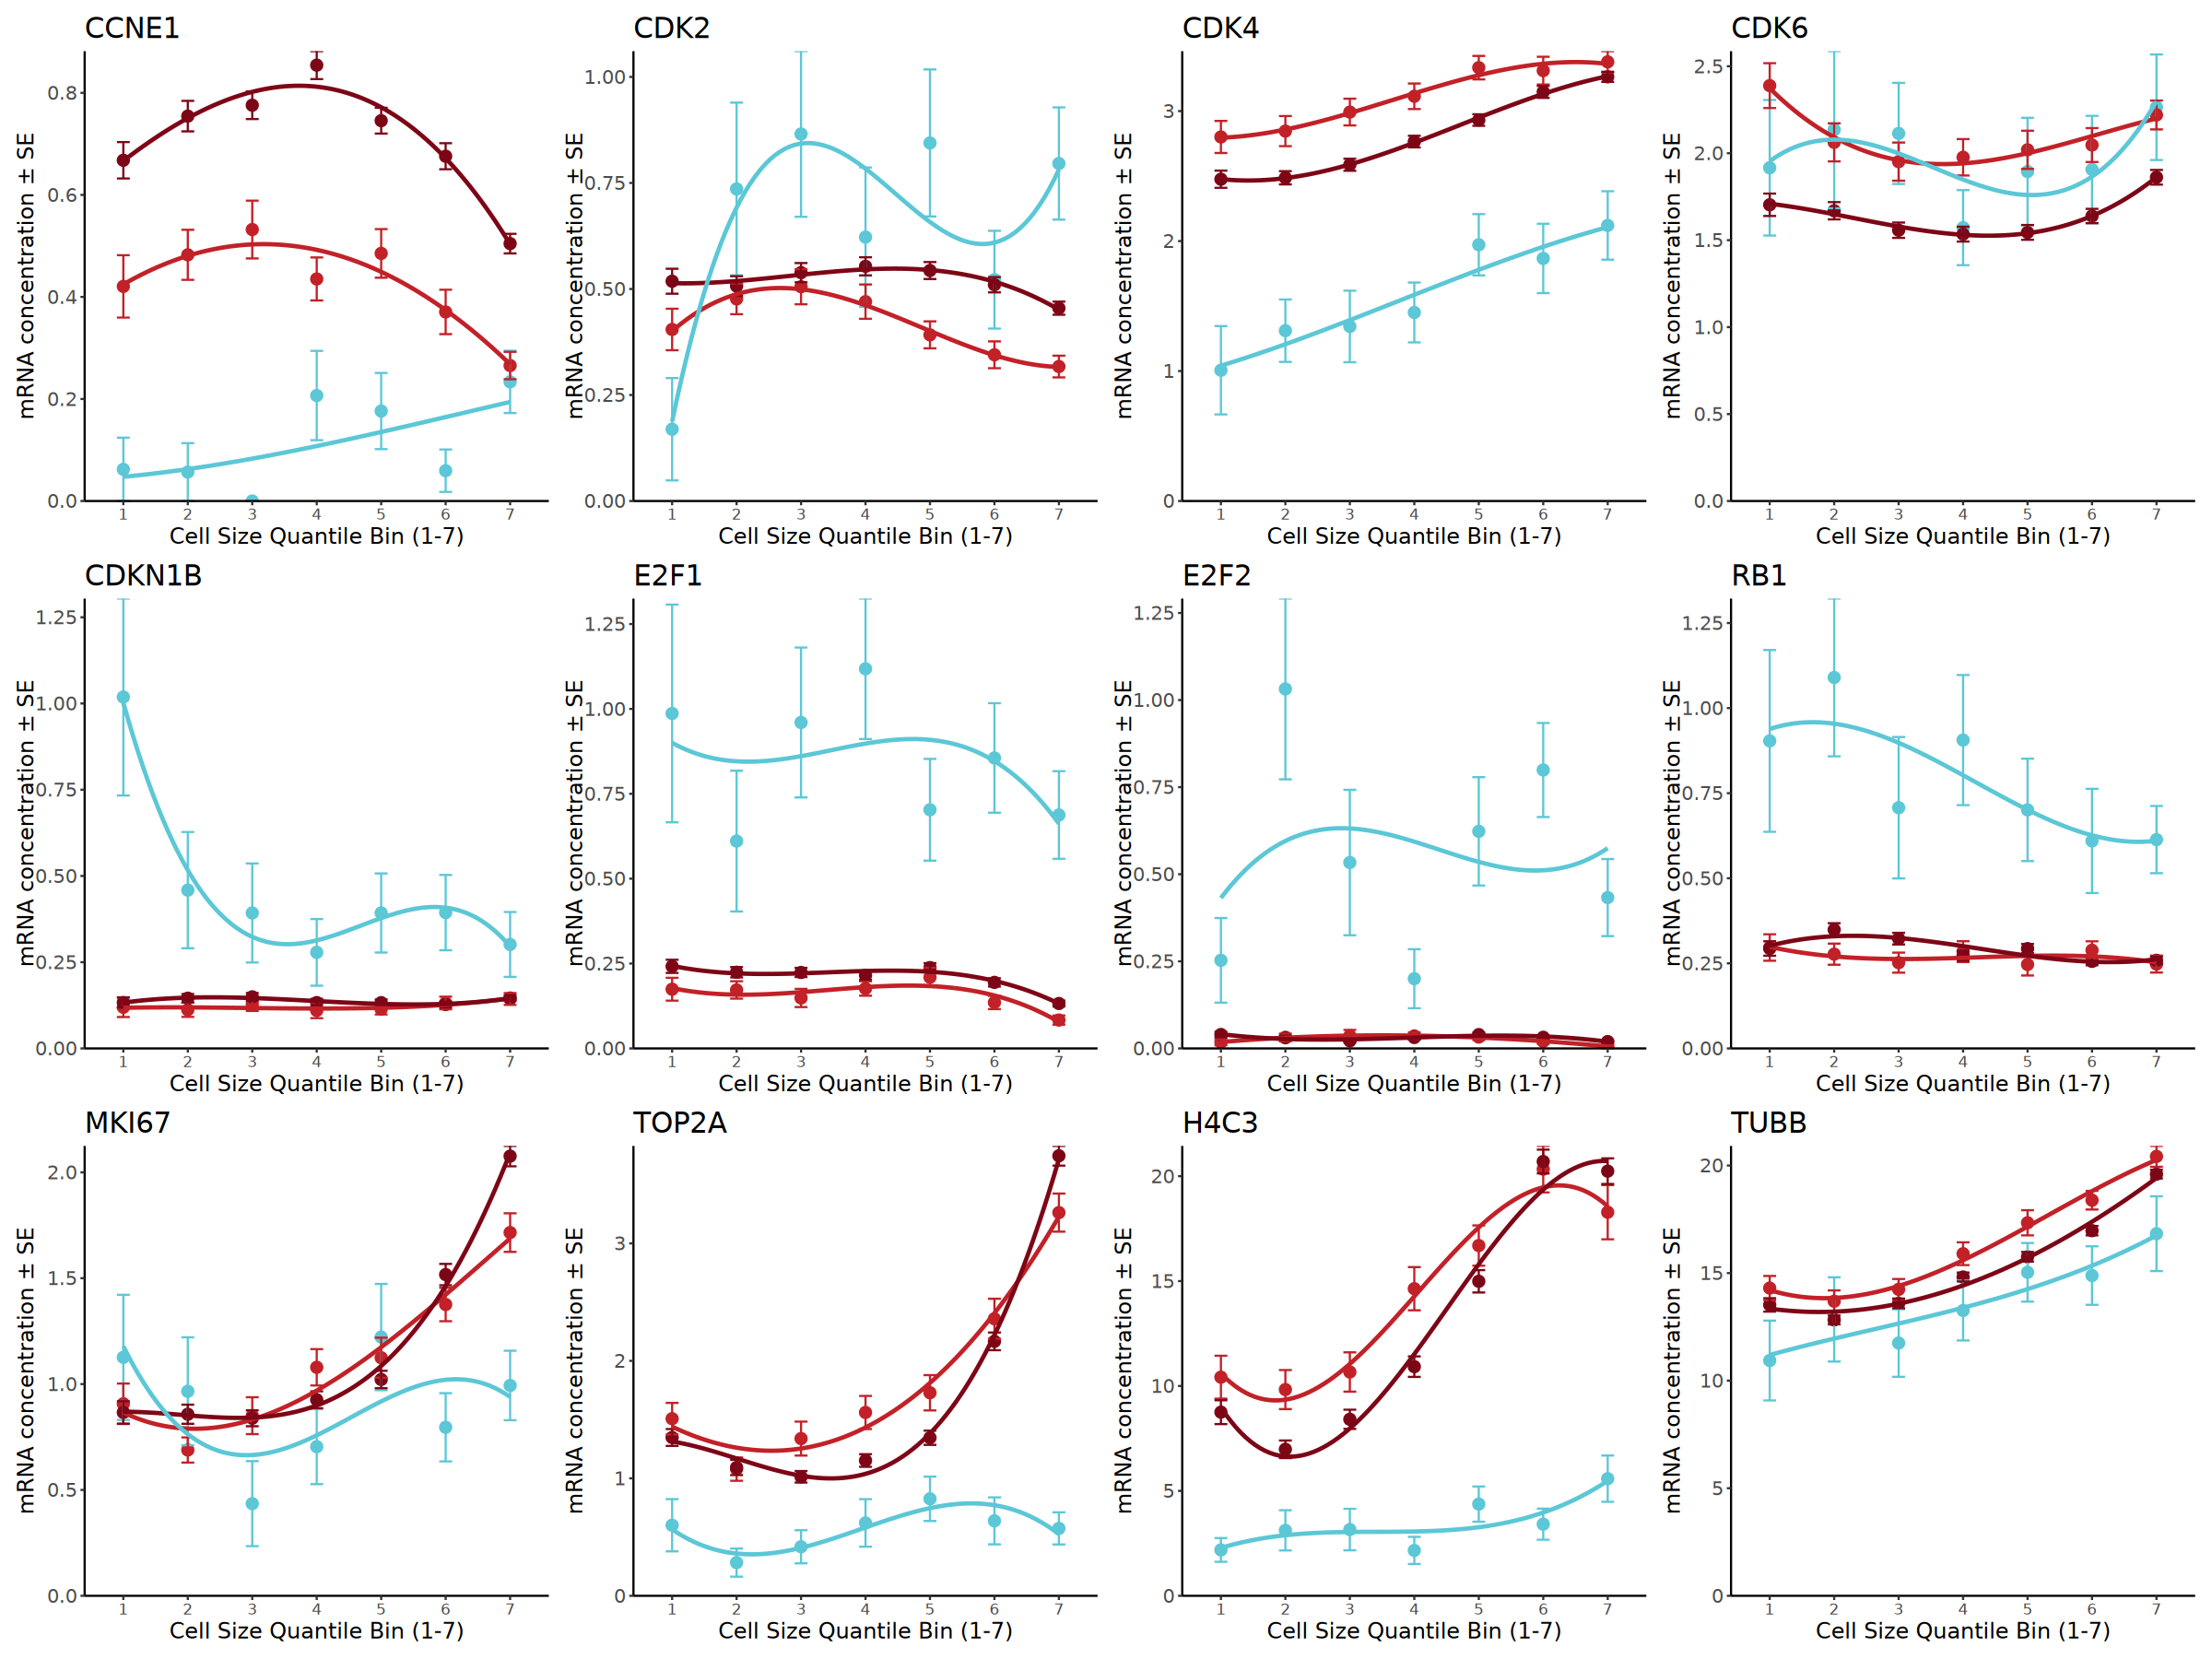

In [24]:
genes_to_plot <- c("CCNE1", "CDK2", "CDK4", "CDK6",
   
             "CDKN1B","E2F1","E2F2", "RB1",
             "MKI67", "TOP2A", "H4C3", "TUBB")

genes_available <- intersect(genes_to_plot, rownames(ad2$var))
gene_indices <- match(genes_available, rownames(ad2$var))

expr_mat <- ad2$X[, gene_indices]
expr_df <- as.data.frame(as.matrix(expr_mat)) 
colnames(expr_df) <- genes_available
expr_df <- cbind(expr_df, ad2$obs)

cell_types <- c(#"Pro-B-cycling-1",
                "Pro-B-1",
                "ERP-7", "ERP-8")
cell_colors <- c(#"ProB" = "#93CEDC",
                "Pro-B-1" = "#5cc7d6",
                # "Pro-B-cycling-1" = "#42bace", 
                 "ERP-7" = "#c22128", 
            "ERP-8" = "#7d0616"
)

n_bins <- 7

plot_list <- list()

for (gene in genes_available) {
  gene_df <- data.frame()
  
  for (ct in cell_types) {
    df_ct <- expr_df %>%
      filter(cell_type == ct) %>%
      mutate(
        gene_value = .data[[gene]],
        bin_index = ntile(total_RNA_in_cell, n_bins),
        cell_type = ct
      )
    
    # filter out bins with less than 1 cell
    valid_bins <- df_ct %>%
      group_by(bin_index) %>%
      filter(n() >= 1) %>%
      pull(bin_index) %>%
      unique()
    
    df_ct_filtered <- df_ct %>%
      filter(bin_index %in% valid_bins) %>%
      mutate(concentration = 10000 * gene_value / total_RNA_in_cell) %>%
      group_by(bin_index, cell_type) %>%
      summarise(
        mean_concentration = mean(concentration, na.rm = TRUE),
        se = sd(concentration, na.rm = TRUE) / sqrt(n()),
        .groups = "drop"
      )
    
    gene_df <- bind_rows(gene_df, df_ct_filtered)
  }
  

  p <- ggplot(gene_df, aes(x = factor(bin_index), y = mean_concentration, 
                           color = cell_type, group = cell_type)) +
    geom_point(size = 3) +
    geom_errorbar(aes(ymin = mean_concentration - se, 
                      ymax = mean_concentration + se), 
                  width = 0.2, linewidth = 0.5) +
    geom_smooth(method = "lm", formula = y ~ poly(x, 3), se = FALSE) +
    scale_color_manual(values = cell_colors) +
    scale_y_continuous(limits = c(0, NA), expand = c(0, 0)) +
    scale_x_discrete(drop = FALSE) +
    theme_classic() +
    theme(
      axis.text.x = element_text(size = 10),
      axis.ticks.x = element_line(),
      axis.text.y = element_text(size = 12),
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      plot.title = element_text(size = 18, face = "bold.italic"),
      legend.title = element_blank()
    ) +
    labs(title = gene, x = paste0("Cell Size Quantile Bin (1-", n_bins, ")"), 
         y = "mRNA concentration ± SE")
  
  plot_list[[gene]] <- p
}

final_plot <- wrap_plots(plot_list, ncol = 4) & theme(legend.position = "none")

fig(20, 15) 
print(final_plot)

In [25]:
ggsave("./data/fig8.pdf", 
       final_plot, width = 20, height = 15, 
       units = "in", useDingbats = FALSE)

`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 8 rows containing missing values or values outside the scale range
(`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 39 rows containing missing values or values outside the scale range
(`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 38 rows containing missing values or values outside the scale range
(`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 11 rows containing missing values or values outside the scale range
(`geom_smooth()`).”
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 42 rows containing missing values or values outside the scale range
(`geom_smooth()`).”
`geom_smooth()` using formula =

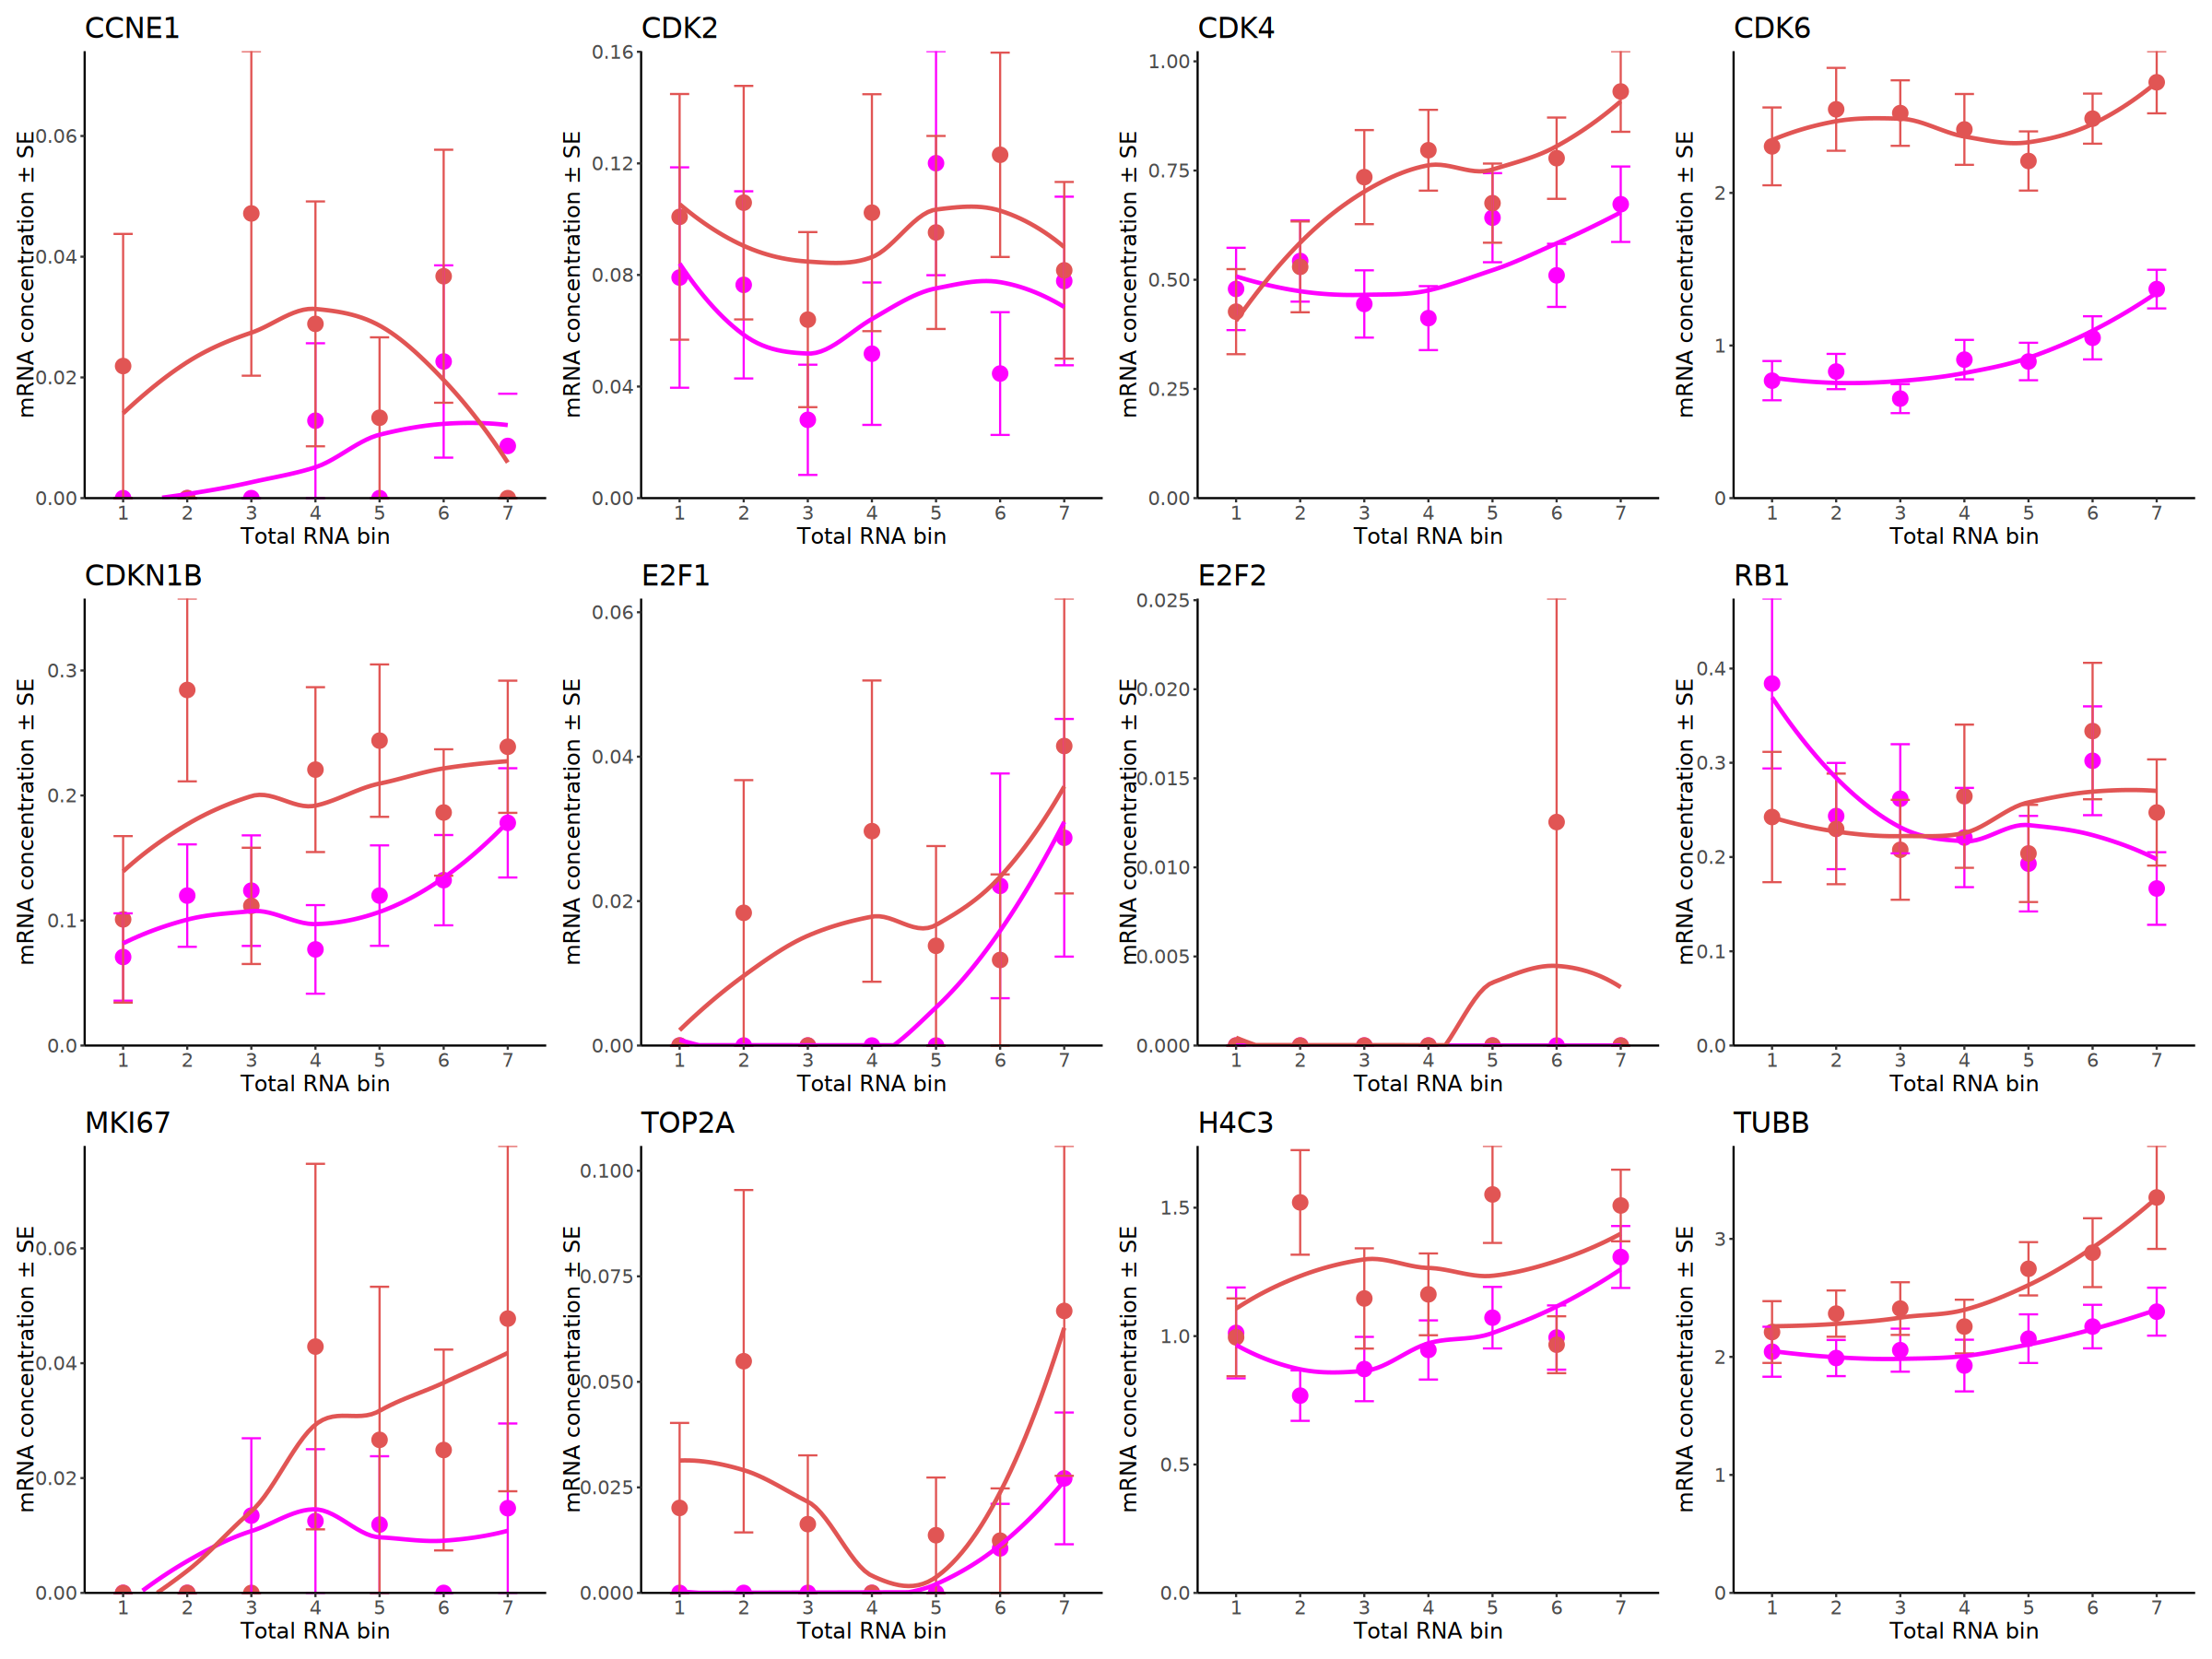

In [105]:
genes_to_plot <- c("CCNE1", "CDK2", "CDK4", "CDK6",
   
             "CDKN1B","E2F1","E2F2", "RB1",
             "MKI67", "TOP2A", "H4C3", "TUBB")

genes_available <- intersect(genes_to_plot, rownames(ad2$var))
gene_indices <- match(genes_available, rownames(ad2$var))

expr_mat <- ad2$X[, gene_indices]
expr_df <- as.data.frame(as.matrix(expr_mat)) 
colnames(expr_df) <- genes_available
expr_df <- cbind(expr_df, ad2$obs)

cell_types <- c("HSC-2", "MPP-2")
cell_colors <- c(
  "HSC-2" = "magenta", 
  "MPP-2" = "#E15554"  
)

n_bins <- 7

plot_list <- list()

for (gene in genes_available) {
  gene_df <- data.frame()
  
  for (ct in cell_types) {
    df_ct <- expr_df %>%
      filter(cell_type == ct) %>%
      mutate(
        gene_value = .data[[gene]],
        bin_index = ntile(total_RNA_in_cell, n_bins),
        cell_type = ct
      )
    
    # Filter out bins with less than 1 cell
    valid_bins <- df_ct %>%
      group_by(bin_index) %>%
      filter(n() >= 1) %>%
      pull(bin_index) %>%
      unique()
    
    df_ct_filtered <- df_ct %>%
      filter(bin_index %in% valid_bins) %>%
      mutate(concentration = 10000 * gene_value / total_RNA_in_cell) %>%
      group_by(bin_index, cell_type) %>%
      summarise(
        mean_concentration = mean(concentration, na.rm = TRUE),
        se = sd(concentration, na.rm = TRUE) / sqrt(n()),
        .groups = "drop"
      )
    
    gene_df <- bind_rows(gene_df, df_ct_filtered)
  }
  
  p <- ggplot(gene_df, aes(x = factor(bin_index), y = mean_concentration, 
                           color = cell_type, group = cell_type)) +
    geom_point(size = 4) +
    geom_errorbar(aes(ymin = mean_concentration - se, 
                      ymax = mean_concentration + se), 
                  width = 0.3, linewidth = 0.5) +
   # geom_smooth(method = "lm", formula = y ~ poly(x, 3), se = FALSE) +
    geom_smooth(method = "loess", se = FALSE, span = 1) +
    scale_color_manual(values = cell_colors) +
    scale_y_continuous(limits = c(0, NA), expand = c(0, 0)) +
    scale_x_discrete(drop = FALSE) +
    theme_classic() +
    theme(
      axis.text.x = element_text(size = 12),
      axis.ticks.x = element_line(),
      axis.text.y = element_text(size = 12),
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      plot.title = element_text(size = 18, face = "bold.italic"),
      legend.title = element_blank()
    ) +
    labs(title = gene, x = paste0("Total RNA bin"), 
         y = "mRNA concentration ± SE")
  
  plot_list[[gene]] <- p
}


final_plot <- wrap_plots(plot_list, ncol = 4) & theme(legend.position = "none")

fig(20, 15) 
print(final_plot)

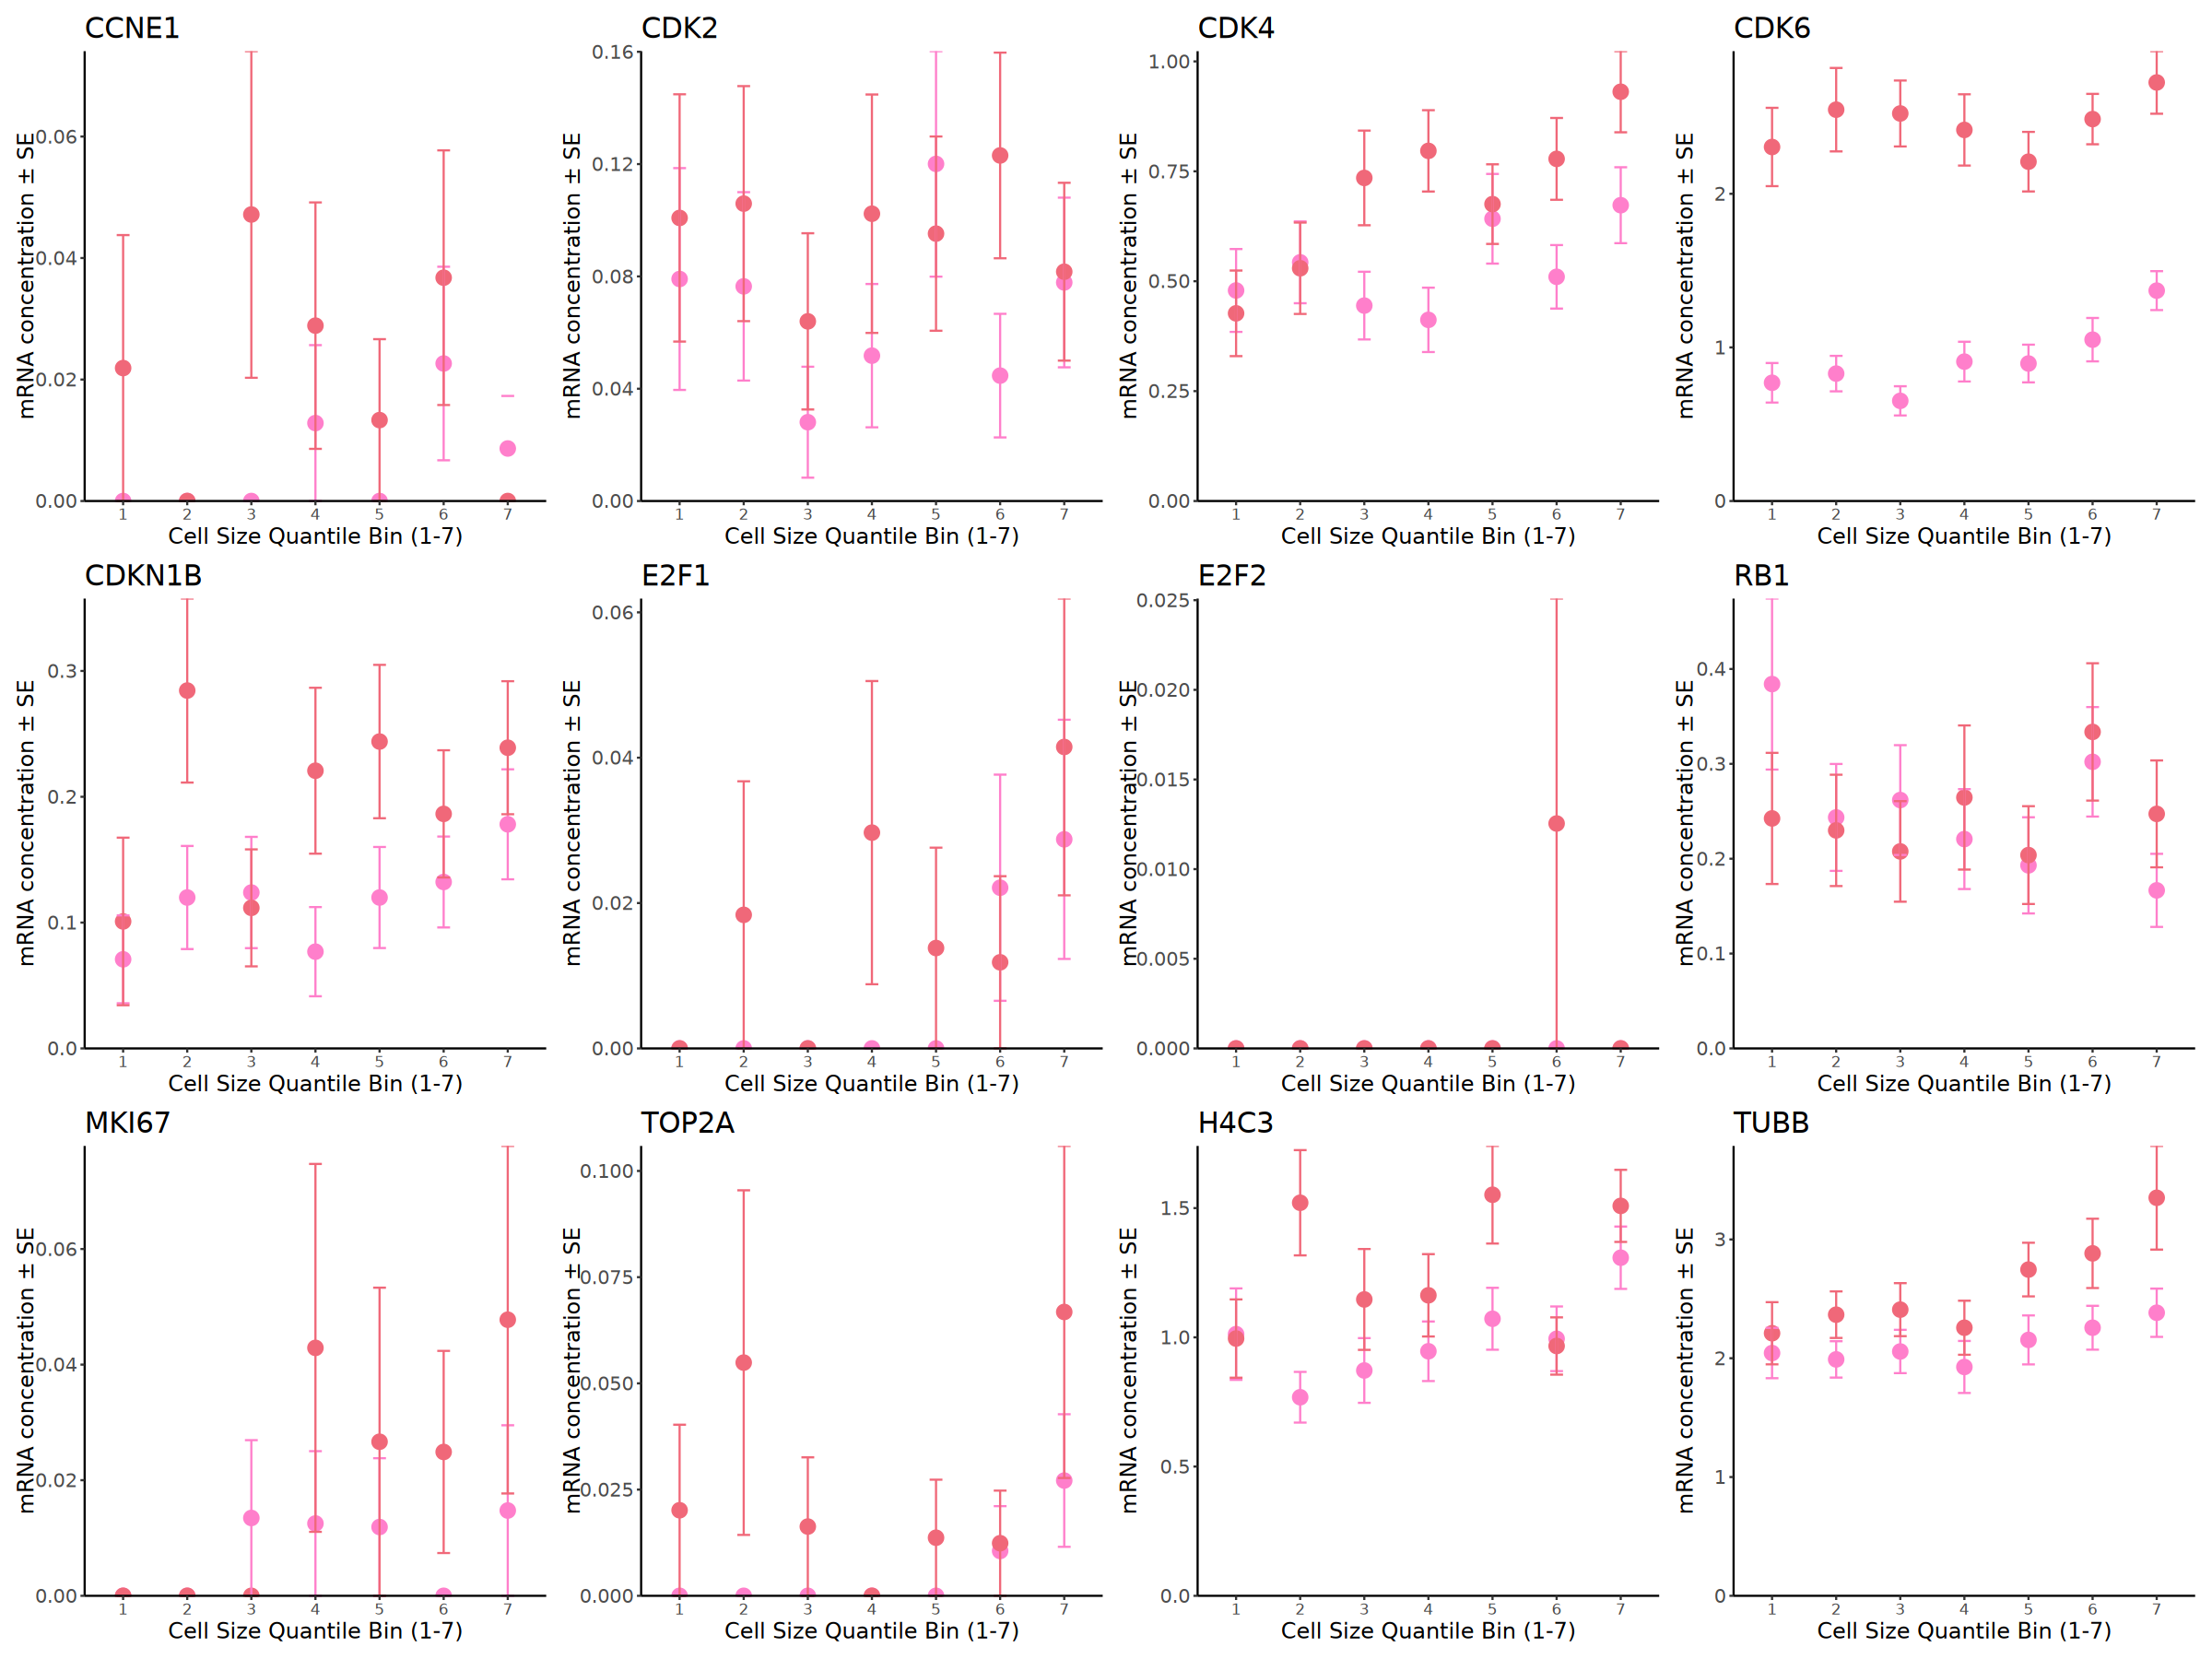

In [31]:
genes_to_plot <- c("CCNE1", "CDK2", "CDK4", "CDK6",
                   "CDKN1B","E2F1","E2F2", "RB1",
                   "MKI67", "TOP2A", "H4C3", "TUBB")

genes_available <- intersect(genes_to_plot, rownames(ad2$var))
gene_indices <- match(genes_available, rownames(ad2$var))

expr_mat <- ad2$X[, gene_indices]
expr_df <- as.data.frame(as.matrix(expr_mat))  
colnames(expr_df) <- genes_available
expr_df <- cbind(expr_df, ad2$obs)

cell_types <- c("HSC-2", "MPP-2")
cell_colors <- c("HSC-2" = "#FF7FCB", "MPP-2" = "#F06879")

n_bins <- 7

plot_list <- list()

for (gene in genes_available) {
  gene_df <- data.frame()
  
  for (ct in cell_types) {
    df_ct <- expr_df %>%
      filter(cell_type == ct) %>%
      mutate(
        gene_value = .data[[gene]],
        bin_index = ntile(total_RNA_in_cell, n_bins),
        cell_type = ct
      )
    
# filter less than 1 cell in bin
    valid_bins <- df_ct %>%
      group_by(bin_index) %>%
      filter(n() >= 1) %>%
      pull(bin_index) %>%
      unique()
    
    df_ct_filtered <- df_ct %>%
      filter(bin_index %in% valid_bins) %>%
      mutate(concentration = 10000 * gene_value / total_RNA_in_cell) %>%
      group_by(bin_index, cell_type) %>%
      summarise(
        mean_concentration = mean(concentration, na.rm = TRUE),
        se = sd(concentration, na.rm = TRUE) / sqrt(n()),
        .groups = "drop"
      )
    
    gene_df <- bind_rows(gene_df, df_ct_filtered)
  }
  

  p <- ggplot(gene_df, aes(x = factor(bin_index), y = mean_concentration, 
                           color = cell_type, group = cell_type)) +
    geom_point(size = 4) +
    geom_errorbar(aes(ymin = mean_concentration - se, 
                      ymax = mean_concentration + se), 
                  width = 0.2, linewidth = 0.5) +

    scale_color_manual(values = cell_colors) +
    scale_y_continuous(limits = c(0, NA), expand = c(0, 0)) +
    scale_x_discrete(drop = FALSE) +
    theme_classic() +
    theme(
      axis.text.x = element_text(size = 10),
      axis.ticks.x = element_line(),
      axis.text.y = element_text(size = 12),
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      plot.title = element_text(size = 18, face = "bold.italic"),
      legend.title = element_blank()
    ) +
    labs(title = gene, x = paste0("Cell Size Quantile Bin (1-", n_bins, ")"), 
         y = "mRNA concentration ± SE")
  
  plot_list[[gene]] <- p
}


final_plot <- wrap_plots(plot_list, ncol = 4) & theme(legend.position = "none")

fig(20, 15)  
print(final_plot)

In [32]:
ggsave("./data/fig8_suppl_HSCMPP.pdf", 
       final_plot, width = 20, height = 15, 
       units = "in", useDingbats = FALSE)

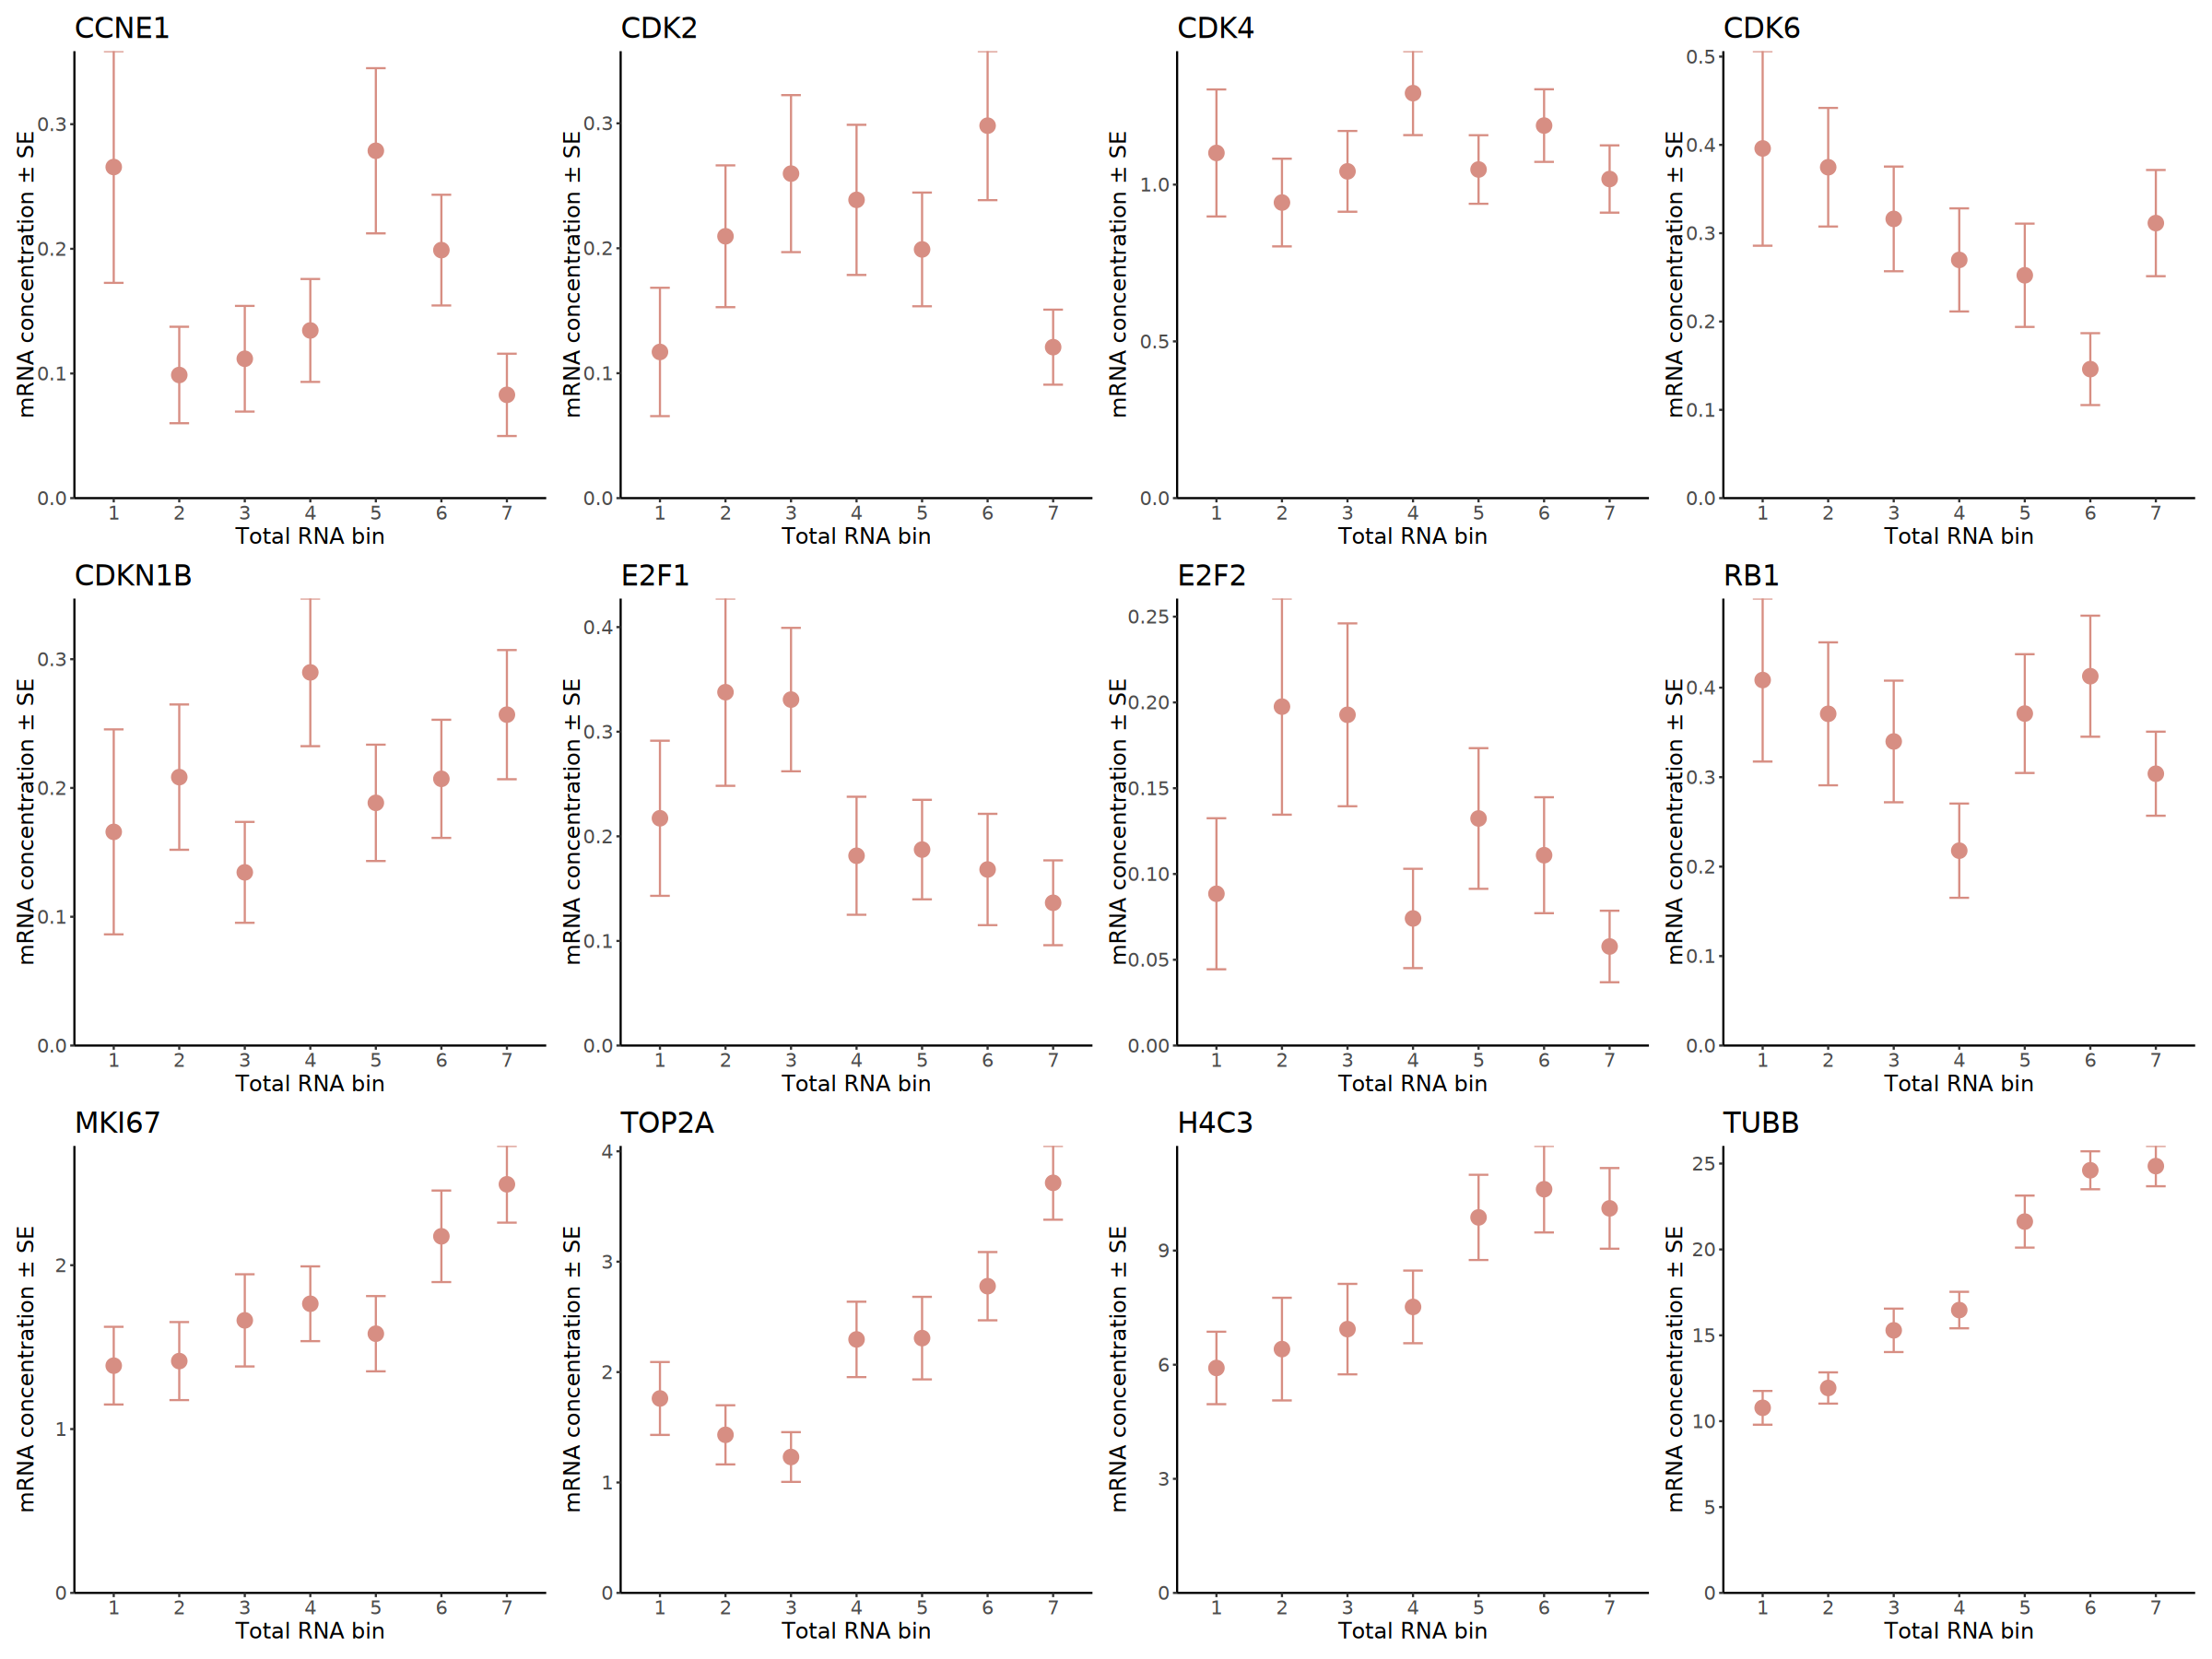

In [27]:
genes_to_plot <- c("CCNE1", "CDK2", "CDK4", "CDK6",
                   "CDKN1B", "E2F1", "E2F2", "RB1",
                   "MKI67", "TOP2A", "H4C3", "TUBB")

genes_available <- intersect(genes_to_plot, rownames(ad2$var))
gene_indices <- match(genes_available, rownames(ad2$var))

expr_mat <- ad2$X[, gene_indices]
expr_df <- as.data.frame(as.matrix(expr_mat)) 
colnames(expr_df) <- genes_available
expr_df <- cbind(expr_df, ad2$obs)

cell_types <- c("pre-DC-1")
cell_colors <- c("pre-DC-1"  = "#d78e83")
n_bins <- 7


plot_list <- list()

for (gene in genes_available) {
  gene_df <- data.frame()
  
  for (ct in cell_types) {
    df_ct <- expr_df %>%
      filter(cell_type == ct) %>%
      mutate(
        gene_value = .data[[gene]],
        bin_index = ntile(total_RNA_in_cell, n_bins),
        cell_type = ct
      )
    
    # Filter out bins with less than 1 cell
    valid_bins <- df_ct %>%
      group_by(bin_index) %>%
      filter(n() >= 1) %>%
      pull(bin_index) %>%
      unique()
    
    df_ct_filtered <- df_ct %>%
      filter(bin_index %in% valid_bins) %>%
      mutate(concentration = 10000 * gene_value / total_RNA_in_cell) %>%
      group_by(bin_index, cell_type) %>%
      summarise(
        mean_concentration = mean(concentration, na.rm = TRUE),
        se = sd(concentration, na.rm = TRUE) / sqrt(n()),
        .groups = "drop"
      )
    
    gene_df <- bind_rows(gene_df, df_ct_filtered)
  }
  
  p <- ggplot(gene_df, aes(x = factor(bin_index), y = mean_concentration, 
                           color = cell_type, group = cell_type)) +
    geom_point(size = 4) +
    geom_errorbar(aes(ymin = mean_concentration - se, 
                      ymax = mean_concentration + se), 
                  width = 0.3, linewidth = 0.5) +

    scale_color_manual(values = cell_colors) +
    scale_y_continuous(limits = c(0, NA), expand = c(0, 0)) +
    scale_x_discrete(drop = FALSE) +
    theme_classic() +
    theme(
      axis.text.x = element_text(size = 12),
      axis.ticks.x = element_line(),
      axis.text.y = element_text(size = 12),
      axis.title.x = element_text(size = 14),
      axis.title.y = element_text(size = 14),
      plot.title = element_text(size = 18, face = "bold.italic"),
      legend.title = element_blank()
    ) +
    labs(title = gene, x = paste0("Total RNA bin"), 
         y = "mRNA concentration ± SE")
  
  plot_list[[gene]] <- p
}

final_plot <- wrap_plots(plot_list, ncol = 4) & theme(legend.position = "none")

print(final_plot)


In [28]:
ggsave("./data/fig8_suppl_preDC.pdf", 
       final_plot, width = 20, height = 15, 
       units = "in", useDingbats = FALSE)